<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Analyzing the Apprentice Chef's First Year Customer </h2>
<h4>DAT-5303 | Regression Model Development | Individual Assignment</h4>
Models used OLS Regression, Lasso Regression and ARD Regression <br>
Created by <a href="https://www.linkedin.com/in/linginenivishal/"> Vishal Lingineni </a> <br>
Hult International Business School

<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Purpose of this Script</h2><br>
This script is designed to analyze the Apprentice Chef's First Year Customer Data to predict how much revenue to expect from each Customer.
<br>
<h2>Analytical Objectives</h2><br>
a) Make a prediction for the Revenue from each customer, which is assumed to be a continuous variable.<br>
b) Identify key features that impact Revenue.
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Importing & Exploring the Data  </h2><br>

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
restarunt = pd.read_excel(io=file)

In [2]:
restarunt.columns = map(str.lower, restarunt.columns)

<h3>Initial Data Exploration</h3>

<h4>a) How many observations (i.e. rows) are present in the dataset? How many features (i.e. columns)?</h4><br>

In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {restarunt.shape[0]}
Features:     {restarunt.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



<h4>b) Display general information about each variable, including types and the number of non-missing values.</h4>

In [4]:
# INFOrmation about each variable
restarunt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
revenue                        1946 non-null float64
cross_sell_success             1946 non-null int64
name                           1946 non-null object
email                          1946 non-null object
first_name                     1946 non-null object
family_name                    1899 non-null object
total_meals_ordered            1946 non-null int64
unique_meals_purch             1946 non-null int64
contacts_w_customer_service    1946 non-null int64
product_categories_viewed      1946 non-null int64
avg_time_per_site_visit        1946 non-null float64
mobile_number                  1946 non-null int64
cancellations_before_noon      1946 non-null int64
cancellations_after_noon       1946 non-null int64
tastes_and_preferences         1946 non-null int64
pc_logins                      1946 non-null int64
mobile_logins                  1946 non-null int64
weekly_plan       

It appears that the dataset contains a mix of data types. Let's analyze this in more detail as it will effect our approach to developing a machine learning model for predicting revenue ( revenue ). 

<h3>Analyzing the Distribution of Revenue</h3>

<h4>c) Develop a histogram to analyze the distribution of the Y-variable.</h4><br>
Does it look as if this variable is normally distributed? Does it appear to be skewed positive or negative?

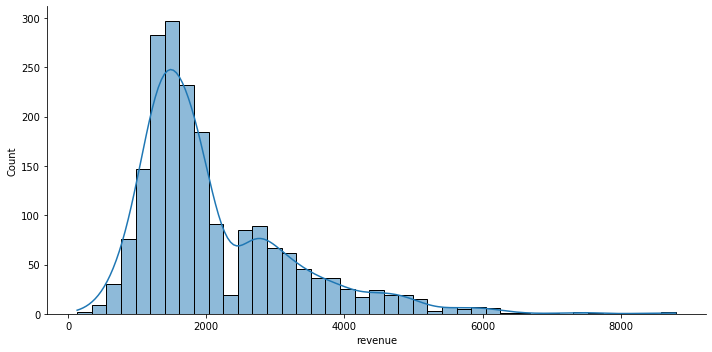

In [5]:
# using the updated version of distplot which is displot
sns.displot(data   = restarunt,
            x      = "revenue",
            height = 5,
            aspect = 2,
           kde=True)
plt.show()

Using this figure we can see that the <strong> majority of our customers spent 
an average of around 1800</strong> <br>
This is a normal distribution but it is positively skewed <br>
Lets transform this variable and see if it removes the skewness

<h4>d) Develop a histogram to analyze the distribution of the transformed Y-variable.</h4><br>

In [6]:
# log transforming REVENUE and saving it to the dataset
restarunt['log_revenue'] = np.log10(restarunt["revenue"])

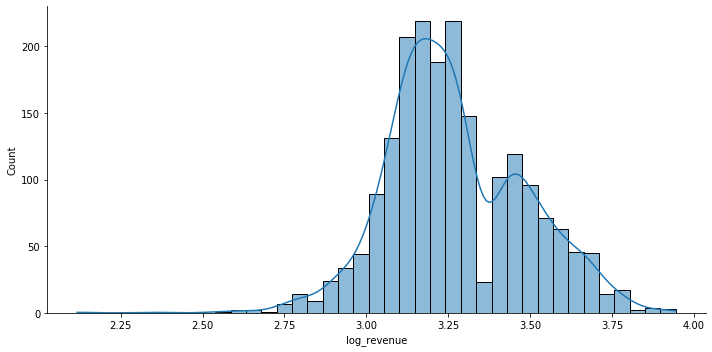

In [7]:
sns.displot(data   = restarunt,
            x      = "log_revenue",
            height = 5,
            aspect = 2,
           kde=True)
plt.show()

As we can see the log values are <strong>more normally distributed and less skewed</strong> compared to the original values<br>

<h4>e) Generate descriptive statistics for each quantitative column.</h4><br>

In [8]:
restarunt.describe(include='number').round(2)

,revenue,cross_sell_success,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,3.27
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.21
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,2.12
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,3.13
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,3.24
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,3.43
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,3.94


<h4>f) identify the data type of each original variable in the dataset basing on the above output.</h4><br>
Use the following groupings:

* CONTINUOUS
* INTERVAL/COUNT
* CATEGORICAL

In [9]:
print("""CONTINUOUS
----------
revenue (Y-variable)
avg_time_per_site_visit
avg_prep_vid_time
total_meals_ordered

INTERVAL/COUNT
--------------
cross_sell_success
unique_meals_purch
contacts_w_customer_service
product_categories_viewed
mobile_number
cancellations_before_noon
cancellations_after_noon
tastes_and_preferences
pc_logins
mobile_logins
weekly_plan
early_deliveries
late_deliveries
package_locker
refrigerated_locker
largest_order_size
master_classes_attended
median_meal_rating
avg_clicks_per_visit
total_photos_viewed

CATEGORICAL
-----------
email
first_name (not to be used in modeling)
last_name (not to be used in modeling)
name (not to be used in modeling) """)

CONTINUOUS
----------
revenue (Y-variable)
avg_time_per_site_visit
avg_prep_vid_time
total_meals_ordered

INTERVAL/COUNT
--------------
cross_sell_success
unique_meals_purch
contacts_w_customer_service
product_categories_viewed
mobile_number
cancellations_before_noon
cancellations_after_noon
tastes_and_preferences
pc_logins
mobile_logins
weekly_plan
early_deliveries
late_deliveries
package_locker
refrigerated_locker
largest_order_size
master_classes_attended
median_meal_rating
avg_clicks_per_visit
total_photos_viewed

CATEGORICAL
-----------
email
first_name (not to be used in modeling)
last_name (not to be used in modeling)
name (not to be used in modeling) 


<h2>Part II: Handling Missing Values  </h2><br>

<h4>a) Display the number of missing values in the dataset.</h4>

In [10]:
restarunt.isnull().sum(axis=0)

revenue                         0
cross_sell_success              0
name                            0
email                           0
first_name                      0
family_name                    47
total_meals_ordered             0
unique_meals_purch              0
contacts_w_customer_service     0
product_categories_viewed       0
avg_time_per_site_visit         0
mobile_number                   0
cancellations_before_noon       0
cancellations_after_noon        0
tastes_and_preferences          0
pc_logins                       0
mobile_logins                   0
weekly_plan                     0
early_deliveries                0
late_deliveries                 0
package_locker                  0
refrigerated_locker             0
avg_prep_vid_time               0
largest_order_size              0
master_classes_attended         0
median_meal_rating              0
avg_clicks_per_visit            0
total_photos_viewed             0
log_revenue                     0
dtype: int64

In [11]:
restarunt = restarunt.drop(['family_name'], axis = 1) 
# dropping this column as we are anyway not using it in our analysis

As there are missing values only in family name which we are not going to use in our analysis there is no need for imputing missing values, instead we dropped that column.

<h2>Part III: Feature Engineering </h2><br>

<h3>Working with Continuous Data</h3>

<h4>Trend Based Features</h4><br>
Our goal here is to identify where a variable's trend changes in terms of its relationship with what we are trying to predict (in this case, the revenue). In other words, if we analyze a scatter plot and discover that the trend between two variables is not consistent, we can capture this information in the same manner as developing outlier flags. Such a practice may help in improving our predictions, as well as in generating insights

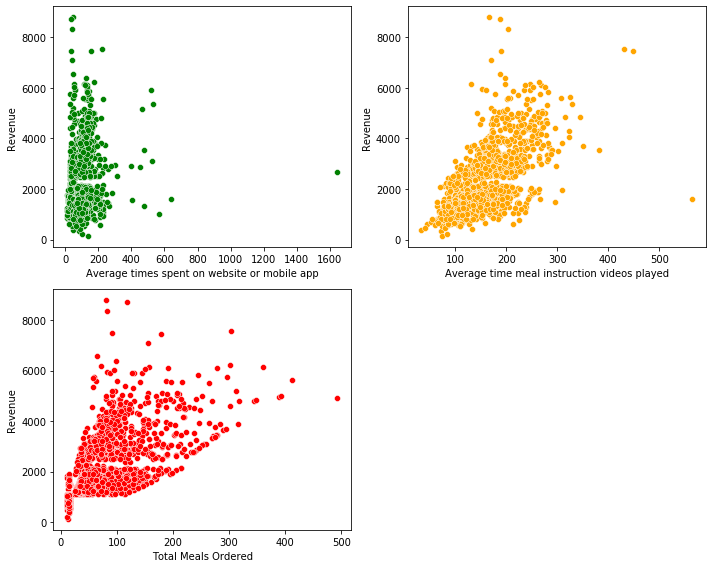

In [12]:
########################################################
# Visual EDA (Scatterplots) for all Continous Variables
########################################################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = restarunt['avg_time_per_site_visit'],
                y = restarunt['revenue'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average times spent on website or mobile app')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = restarunt['avg_prep_vid_time'],
                y = restarunt['revenue'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average time meal instruction videos played')
plt.ylabel(ylabel = 'Revenue')


########################

# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = restarunt['total_meals_ordered'],
                y = restarunt['revenue'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

########################

There is no need to create any new features using these variables.

In [13]:
features_corr = restarunt.corr()
features_corr.loc['revenue',['total_meals_ordered','avg_prep_vid_time','avg_time_per_site_visit']]

total_meals_ordered        0.600489
avg_prep_vid_time          0.643580
avg_time_per_site_visit    0.144572
Name: revenue, dtype: float64

Avg time meal instruction videos are played, Total meals ordered are having linear relation and a good correlation with Revenue.<br>
Coming to Avg time spend on website or mobile app is not having much correlation with revenue.

<h4>Feature Engineering Revenue</h4>

In [14]:
restarunt['revenue_per_order'] = 0
for index, value in restarunt.iterrows():
    if restarunt.loc[index,'revenue'] > 0:
        restarunt.loc[index,'revenue_per_order'] = (restarunt.loc[index,'revenue'] / restarunt.loc[index,'total_meals_ordered']).round(0)
                                            

In [15]:
restarunt.head(5)

,revenue,cross_sell_success,name,email,first_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,tastes_and_preferences,pc_logins,mobile_logins,weekly_plan,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,log_revenue,revenue_per_order
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,28.0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,16.0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,53.0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,46.0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,32.0


In [16]:
restarunt['log_avg_time_per_site_visit'] = np.log10(restarunt["avg_time_per_site_visit"])

KeyboardInterrupt: 

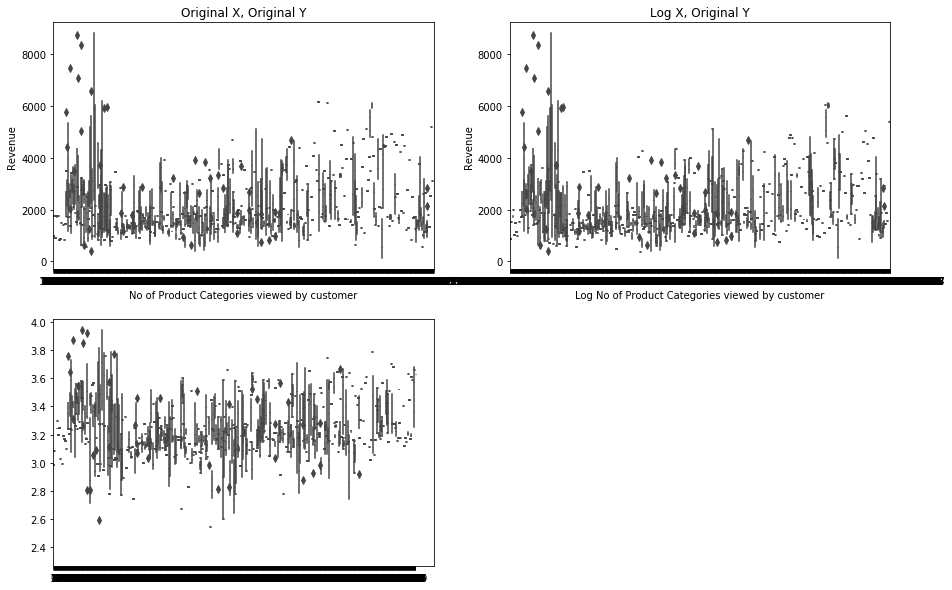

In [17]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'avg_time_per_site_visit',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Revenue')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_avg_time_per_site_visit',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'Log No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Revenue')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'avg_time_per_site_visit',
            y     = 'log_revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Log Revenue')


## Plot 4: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_avg_time_per_site_visit',
            y     = 'log_revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'Log No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Log Revenue')


## displaying the visuals ##
plt.tight_layout()
plt.show()


# printing value counts and correlations bathrooms
print(f"""

--------------------------------------------
Total no of Meal Categories viewed per user
--------------------------------------------
{restarunt['avg_time_per_site_visit'].value_counts(normalize = False).sort_index()}
      

""")


<h3>Working with Count and Interval Data</h3><br>
Scatter plots can be very confusing when working with interval and count data. Therefore, it is a better practice is to use boxplots when visualizing relationships with such data. Check whether the median line of box plots is following a linear trend otherwise transform those variables

<h4>Flag based feature engineering on Weekly Plan Information</h4>

In [ ]:
# developing a scatterplot
sns.scatterplot(x = restarunt['weekly_plan'],
                y = restarunt['revenue'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly plan')
plt.ylabel(ylabel = 'Revenue')
plt.show()

As we can see this is a zero inflated distribution and there is no linear relation. <br>
Lets create a dummy variable to see if the correlation with revenue increase

In [ ]:
# counting the number of zeroes
wkp_zeroes   = len(restarunt['weekly_plan'][restarunt['weekly_plan'] == 0])

# printing a table of the results
print(f"""
                            No\t\tYes
                           ----------------------------
Weekly Plan              | {wkp_zeroes}\t\t{len(restarunt) - wkp_zeroes}
""")

In [ ]:
# dummy variable for having a weekly plan.
restarunt['has_weekly_plan'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'weekly_plan'] > 0 :
        restarunt.loc[index, 'has_weekly_plan'] = 1

In [ ]:
sns.boxplot(x     = 'has_weekly_plan',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between having weekly plan and Revenue')
plt.xlabel(xlabel = 'Has subscribed to weekly plan')
plt.ylabel(ylabel = 'Revenue')
plt.show()

# developing a small correlation matrix
zeroes_corr = restarunt.corr()    # .round(decimals = 2)

# checking the correlations of the newly-created variable with revenue
zeroes_corr.loc['revenue',                                   # Y-variable
               ['has_weekly_plan','weekly_plan']].sort_values(ascending = False)

Even though there is no significant linear relation, the correlation of this new feature is better than our original variable.

<h4>Flag based feature engineering on Masters Class Information</h4>

In [ ]:
sns.boxplot(x     = 'master_classes_attended',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between attending a cooking class and Revenue')
plt.xlabel(xlabel = 'No of cooking classes attended')
plt.ylabel(ylabel = 'Revenue')
plt.show()
print(f"""
No of times attended a cooking class
=========

-------------------------------------------------
Total no of cooking classes attended
-------------------------------------------------
{restarunt['master_classes_attended'].value_counts(normalize = False).sort_index()}

""")

In [ ]:
# dummy variable for doing cooking classes in masters.
restarunt['has_master_classes_attended'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'master_classes_attended'] > 0 :
        restarunt.loc[index, 'has_master_classes_attended'] = 1

In [ ]:
sns.boxplot(x     = 'has_master_classes_attended',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Attending a cooking masters class and Revenue')
plt.xlabel(xlabel = 'Attended a Master Cooking class')
plt.ylabel(ylabel = 'Revenue')
plt.show()

feature_corr = restarunt.corr()
feature_corr.loc['revenue',['has_master_classes_attended','master_classes_attended']].sort_values(ascending = False)

<h4>Flag based feature engineering on Total Photos viewed </h4>

In [ ]:
# developing a scatter of Total Photos viewed
sns.scatterplot(x     = 'total_photos_viewed',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Total Photos viewed by user and Revenue')
plt.xlabel(xlabel = 'Total Photos viewed')
plt.ylabel(ylabel = 'Revenue')
plt.show()


As we can see this is a zero inflated distribution.  

In [ ]:
# counting the number of zeroes
tpv_zeroes   = len(restarunt['total_photos_viewed'][restarunt['total_photos_viewed'] == 0])

# printing a table of the results
print(f"""
                                     No\t\tYes
                                 ----------------------------
Photo viewed or not              | {tpv_zeroes}\t\t{len(restarunt) - tpv_zeroes}
""")

In [ ]:
# dummy variable for having a locker.
restarunt['has_total_photos_viewed'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'total_photos_viewed'] > 0 :
        restarunt.loc[index, 'has_total_photos_viewed'] = 1

In [ ]:
sns.boxplot(x     = 'has_total_photos_viewed',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Viewing photos and Revenue')
plt.xlabel(xlabel = 'Has Viewed photos')
plt.ylabel(ylabel = 'Revenue')
plt.show()
feature_corr = restarunt.corr()
feature_corr.loc['revenue',['has_total_photos_viewed','total_photos_viewed']].sort_values(ascending = False)

<h4>Flag based feature engineering on Deliveries Feature </h4>

In [ ]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 6))


# developing a scatterplot
plt.subplot(1, 2, 1)

sns.boxplot(x     = 'early_deliveries',
            y     = 'revenue',
            data  = restarunt)

# titles and labels
plt.title(label   = 'Relationship between Early Deliveries and Revenue')
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Revenue')

# developing a scatterplot
plt.subplot(1, 2, 2)

sns.boxplot(x     = 'late_deliveries',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Late Deliveries and Revenue')
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')

# displaying the plot
plt.tight_layout
plt.show()

# printing value counts 

print(f"""
Early Deliveries
=========

-----------
Total no of Early Deliveries per user
-----------
{restarunt['early_deliveries'].value_counts(normalize = False).sort_index()}

-----------
Total no of Late Deliveries per user
-----------
{restarunt['late_deliveries'].value_counts(normalize = False).sort_index()}

""")

In [ ]:
# counting the number of zeroes
edl_zeroes   = len(restarunt['early_deliveries'][restarunt['early_deliveries'] == 0])
ldl_zeroes   = len(restarunt['late_deliveries'][restarunt['late_deliveries'] == 0])

# printing a table of the results
print(f"""
                               No\t\tYes
                            -------------------------------
Early Delivery              | {edl_zeroes}\t\t{len(restarunt) - edl_zeroes}
Late Delivery               | {ldl_zeroes}\t\t{len(restarunt) - ldl_zeroes}
""")

In [ ]:
# dummy variable for getting early delivery
restarunt['has_early_deliveries'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'early_deliveries'] > 0 :
        restarunt.loc[index, 'has_early_deliveries'] = 1

In [ ]:
# dummy variable for getting a late delivery.
restarunt['has_late_deliveries'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'late_deliveries'] > 0 :
        restarunt.loc[index, 'has_late_deliveries'] = 1

In [ ]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 6))


# developing a scatterplot
plt.subplot(1, 2, 1)

sns.boxplot(x     = 'has_early_deliveries',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between gettting early delivery and Revenue')
plt.xlabel(xlabel = 'Got earlty delivery ')
plt.ylabel(ylabel = 'Revenue')

# developing a scatterplot
plt.subplot(1, 2, 2)

sns.boxplot(x     = 'has_late_deliveries',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between getting late delivery and Revenue')
plt.xlabel(xlabel = 'Got late delivery ')
plt.ylabel(ylabel = 'Revenue')

# displaying the plot
plt.tight_layout
plt.show()


In [ ]:
# Creating a correlation Matrix
feature_corr = restarunt.corr()
feature_corr.loc['revenue',['has_late_deliveries','has_early_deliveries','late_deliveries','early_deliveries']]

has features are having better correlation with revenue hence keeping them

<h4>Flag based engineering on customer complaints</h4>

In [ ]:
sns.boxplot(x     = 'contacts_w_customer_service',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between No of times contacted customer service by user and Revenue')
plt.xlabel(xlabel = 'No of times contacted customer service')
plt.ylabel(ylabel = 'Revenue')
plt.show()

# printing value counts and correlations bathrooms

print(f"""
--------------------------------------------------------
Total no of times customer service is contacted per user
--------------------------------------------------------
{restarunt['contacts_w_customer_service'].value_counts(normalize = False).sort_index()}
      """)


Revenue is increasing as the No of times customer care is contacted till 10 calls after that it dropped for 11,12 which aligns with real world because after facing too many issue customer will not go to that restarunt

In [ ]:
restarunt['recurring_complaints'] = 0
for index, value in restarunt.iterrows():
    if restarunt.loc[index,'contacts_w_customer_service'] > 10:
        restarunt.loc[index,'recurring_complaints'] = 1
                                            

In [ ]:
sns.boxplot(x     = 'recurring_complaints',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between recurring complaints and revenue')
plt.xlabel(xlabel = 'No of times contacted customer service')
plt.ylabel(ylabel = 'Revenue')
plt.show()

feature_corr = restarunt.corr()
feature_corr.loc['revenue',['recurring_complaints','contacts_w_customer_service']].sort_values(ascending = False)

As we can see that the new feature is more linear and correlated to the revenue

<h4>Visualizing other Features</h4>

In [ ]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# first plot window
plt.subplot(2, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'package_locker',
            y     = 'revenue',
            data  = restarunt)

# titles and labels
plt.title(label   = 'Relationship between Package Loker and Revenue')
plt.xlabel(xlabel = 'Has package locker')
plt.ylabel(ylabel = 'Revenue')


############################

# second plot window
plt.subplot(2, 2, 2)

# developing a boxplot
sns.boxplot(x     = 'refrigerated_locker',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Refrigerated Locker and Revenue')
plt.xlabel(xlabel = 'Has refrigerated locker')
plt.ylabel(ylabel = 'Revenue')

#############################

# third plot window
plt.subplot(2, 2, 3)

sns.boxplot(x     = 'mobile_number',
            y     = 'revenue',
            data  = restarunt)

# titles and labels
plt.title(label   = 'Relationship between has mobile number and Revenue')
plt.xlabel(xlabel = 'Has mobile number')
plt.ylabel(ylabel = 'Revenue')

#############################

# fourth plot window
plt.subplot(2, 2, 4)

sns.boxplot(x     = 'cross_sell_success',
            y     = 'revenue',
            data  = restarunt)

# titles and labels
plt.title(label   = 'Relationship between Cross Sell Promotion and Revenue')
plt.xlabel(xlabel = 'Cross Sell Promotion')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# developing a boxplot
# first plot window
plt.subplot(3, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'tastes_and_preferences',
            y     = 'revenue',
            data  = restarunt)

# titles and labels
plt.title(label   = 'Relationship between Taste Preference and Revenue')
plt.xlabel(xlabel = 'Has taste preference')
plt.ylabel(ylabel = 'Revenue')

############################

# second plot window
plt.subplot(3, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'avg_clicks_per_visit',
            y     = 'revenue',
            data  = restarunt)

# titles and labels
plt.title(label   = 'Relationship between Avg no of clicks per visit by user and Revenue')
plt.xlabel(xlabel = 'Avg no of clicks per visit')
plt.ylabel(ylabel = 'Revenue')

#############################

# third plot window
plt.subplot(3, 2, 3)

# developing a boxplot
sns.boxplot(x     = 'median_meal_rating',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Median Meal Rating and Revenue')
plt.xlabel(xlabel = 'Median Meal Rating')
plt.ylabel(ylabel = 'Revenue')

#############################

# fourth plot window
plt.subplot(3, 2, 4)

sns.boxplot(x     = 'largest_order_size',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Avg No of Meals ordered by user and Revenue')
plt.xlabel(xlabel = 'Avg No of Meals ordered')
plt.ylabel(ylabel = 'Revenue')


#############################

# fourth plot window
plt.subplot(3, 2, 5)

sns.boxplot(x     = 'unique_meals_purch',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Relationship between Unique No of Meal sets ordered by user and Revenue')
plt.xlabel(xlabel = 'Unique No of Meal sets ordered')
plt.ylabel(ylabel = 'Revenue')

##############################

plt.tight_layout()
plt.show()


# developing a correlation matrix
feature_corr = restarunt.loc[ : , ['mobile_number','refrigerated_locker','package_locker',
                                   'cross_sell_success','tastes_and_preferences','avg_clicks_per_visit',
                                   'median_meal_rating','largest_order_size',
                                   'unique_meals_purch','revenue']
                            ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations
print(f"""

-------------------
Avg clicks per user
--------------------
{restarunt['avg_clicks_per_visit'].value_counts(normalize = False).sort_index()}
      

----------------------------
Median Meals Rating per user
----------------------------
{restarunt['median_meal_rating'].value_counts(normalize = False).sort_index()}


-------------------------------------
Avg no of orders placed by each user
-------------------------------------
{restarunt['largest_order_size'].value_counts(normalize = False).sort_index()} 

      
-------------------------------------
Unique no of orders placed by each user
-------------------------------------
{restarunt['unique_meals_purch'].value_counts(normalize = False).sort_index()} 
      
      
---------------------
Correlations
---------------------
{feature_corr['revenue']}

""")


Mobile number is having a slight positive relation with revenue. Hence, having mobile number will help in increasing revenue <br>
As we can see between refrigerated & package Lockers, package lockers seems to be little better <br>
Cross_sell_success, tastes_and_preferences - No sign of increase or decreasing - Will not add much value to our analysis <br>
Revenue is decreasing as the no of avg clicks are increasing <br>
Revenue is increasing as rating and order size increase <br> 

In [ ]:
# As some of the categories in the features are not following linearity we are transforming such the features
restarunt['log_contacts_w_customer_service'] = np.log10(restarunt["contacts_w_customer_service"])
restarunt['log_median_meal_rating'] = np.log10(restarunt["median_meal_rating"])
restarunt['log_largest_order_size'] = np.log10(restarunt["largest_order_size"])
restarunt['log_avg_clicks_per_visit'] = np.log10(restarunt["avg_clicks_per_visit"])

<strong> Unique Meals purchased and Product Categories Viewed are not following linearity hence we are transforming them </strong>

In [ ]:
restarunt['log_product_categories_viewed'] = np.log10(restarunt["product_categories_viewed"])
restarunt['log_unique_meals_purch'] = np.log10(restarunt["unique_meals_purch"])

In [ ]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'product_categories_viewed',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Revenue')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_product_categories_viewed',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'Log No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Revenue')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'product_categories_viewed',
            y     = 'log_revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Log Revenue')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_product_categories_viewed',
            y     = 'log_revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'Log No of Product Categories viewed by customer')
plt.ylabel(ylabel = 'Log Revenue')


## displaying the visuals ##
plt.tight_layout()
plt.show()

## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(3, 2, 1)

sns.boxplot(x     = 'unique_meals_purch',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'No of unique meals ordered by each customer')
plt.ylabel(ylabel = 'Revenue')



## Plot 2: Log X, Original Y ##
plt.subplot(3, 2, 2)
sns.boxplot(x     = 'log_unique_meals_purch',
            y     = 'revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'Log No of unique meals ordered by each customer')
plt.ylabel(ylabel = 'Revenue')


## Plot 3: Original X, Log Y ##
plt.subplot(3, 2, 3)
sns.boxplot(x     = 'unique_meals_purch',
            y     = 'log_revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'No of unique meals ordered by each customer')
plt.ylabel(ylabel = 'Log Revenue')


## Plot 4: Log X, Log Y ##
plt.subplot(3, 2, 4)
sns.boxplot(x     = 'log_unique_meals_purch',
            y     = 'log_revenue',
            data  = restarunt)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'Log No of unique meals ordered by each customer')
plt.ylabel(ylabel = 'Log Revenue')


## displaying the visuals ##
plt.tight_layout()
plt.show()

# printing value counts and correlations bathrooms
print(f"""

--------------------------------------------
Total no of Meal Categories viewed per user
--------------------------------------------
{restarunt['product_categories_viewed'].value_counts(normalize = False).sort_index()}
      
--------------------------------------------
No of Unique Meals ordered per user
--------------------------------------------
{restarunt['unique_meals_purch'].value_counts(normalize = False).sort_index()}

""")


Even after apply log transformation there is no linear relation between product categories viewed and revenue. Hence we can exclude this variable from our analysis

<h3>Working with Categorical Data</h3><br>

<h4>Feature Engineering Email</h4>

In [ ]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in restarunt.iterrows():
    
    # splitting email domain at '@'
    split_email = restarunt.loc[index, 'email'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# displaying the results
email_df[1].value_counts()

In [ ]:
email_df.columns = ['0' , 'email_domain']

In [ ]:
# defining Emails Domain Groups
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com',
                              '@boeing.com', '@caterpillar.com', '@chevron.com',
                             '@cisco.com', '@cocacola.com', '@disney.com',
                             '@dupont.com', '@exxon.com', '@ge.org', 
                              '@goldmansacs.com', '@homedepot.com', '@ibm.com',
                             '@intel.com', '@jnj.com', '@jpmorgan.com', 
                              '@mcdonalds.com', '@merck.com', '@microsoft.com',
                             '@nike.com', '@pfizer.com', '@pg.com', 
                              '@travelers.com', '@unitedtech.com', 
                              '@verizon.com','@visa.com', '@walmart.com',
                             '@unitedhealth.com']

personal_email_domains     = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com','@aol.com','@live.com', '@msn.com', 
                              '@passport.com','@hotmail.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        else:
            placeholder_lst.append('junk')


# concatenating with original DataFrame
restarunt['domain_group'] = pd.Series(placeholder_lst)


# checking results
restarunt['domain_group'].value_counts()


<h4>Visualizing each category of email domain</h4>

In [ ]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

In [ ]:
# calling the function for Email Domain
categorical_boxplots(response = 'revenue',
					 cat_var  = 'domain_group',
					 data     = restarunt)

<h4>One hot encode each categorical variable using get_dummies</h4>

In [ ]:
# one hot encoding categorical variables
one_hot_email_domain      = pd.get_dummies(restarunt['domain_group'])

# dropping categorical variables after they've been encoded
restarunt = restarunt.drop('domain_group', axis = 1)

# joining codings together
restarunt = restarunt.join([one_hot_email_domain])

In [ ]:
restarunt['len_of_name'] = restarunt["name"].str.len()

restarunt['len_of_name']

In [ ]:
# dummy variable for doing cooking classes in masters.
restarunt['has_master_classes_attended'] = 0

for index, value in restarunt.iterrows():
    if restarunt.loc[index, 'master_classes_attended'] > 0 :
        restarunt.loc[index, 'has_master_classes_attended'] = 1

In [ ]:
# guessing gender based on (given) name
#import gender_guesser.detector as gender # guess gender based on (given) name
# placeholder list
placeholder_lst = []


# looping to guess gender
#for name in restarunt['first_name']:
 #   guess = gender.Detector().get_gender(name)
    #print(guess)
  #  placeholder_lst.append(guess)


# converting list into a series
#restarunt['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#restarunt.loc[:, ['first_name','gender_guess']]

In [ ]:
#for val in placeholder_lst:
 #   print("'%s'," %val)

In [ ]:
# Hard coded the gender basing on gender guesser package
placeholder=['unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'mostly_male',
'female',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'female',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'female',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'andy',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'andy',
'male',
'unknown',
'unknown',
'male',
'male',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'female',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'mostly_female',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'mostly_female',
'unknown',
'male',
'unknown',
'female',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'female',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'male',
'mostly_male',
'male',
'male',
'male',
'male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'andy',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'female',
'male',
'male',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'male',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'andy',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'male',
'unknown',
'mostly_female',
'male',
'unknown',
'unknown',
'female',
'male',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'mostly_male',
'mostly_male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'female',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'mostly_male',
'unknown',
'unknown',
'male',
'andy',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'female',
'male',
'female',
'mostly_female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'female',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'mostly_female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'mostly_female',
'female',
'female',
'male',
'male',
'male',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'female',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'unknown',
'andy',
'unknown',
'unknown',
'male',
'male',
'male',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'mostly_male',
'male',
'male',
'unknown',
'male',
'unknown',
'mostly_male',
'female',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'unknown',
'female',
'female',
'unknown',
'unknown',
'unknown',
'mostly_male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'male',
'male',
'unknown',
'female',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'mostly_female',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'andy',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'male',
'mostly_male',
'unknown',
'male',
'male',
'unknown',
'unknown',
'male',
'male',
'male',
'male',
'andy',
'unknown',
'unknown',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'female',
'female',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'unknown',
'male',
'unknown',
'unknown',
'female',
'unknown',
'unknown']

In [ ]:
# converting list into a series
restarunt['gender_guess'] = pd.Series(placeholder)

restarunt['gender_guess'].value_counts()

In [ ]:
# one hot encoding categorical variables
one_hot_gender_guess      = pd.get_dummies(restarunt['gender_guess'])

# dropping categorical variables after they've been encoded
restarunt = restarunt.drop('gender_guess', axis = 1)

# joining codings together
restarunt = restarunt.join([one_hot_gender_guess])

In [ ]:
restarunt.shape

<h2> Part IV: Predictive Modeling </h2>

In [48]:
restarunt.isnull().any()

revenue                            False
cross_sell_success                 False
name                               False
email                              False
first_name                         False
total_meals_ordered                False
unique_meals_purch                 False
contacts_w_customer_service        False
product_categories_viewed          False
avg_time_per_site_visit            False
mobile_number                      False
cancellations_before_noon          False
cancellations_after_noon           False
tastes_and_preferences             False
pc_logins                          False
mobile_logins                      False
weekly_plan                        False
early_deliveries                   False
late_deliveries                    False
package_locker                     False
refrigerated_locker                False
avg_prep_vid_time                  False
largest_order_size                 False
master_classes_attended            False
median_meal_rati

In [50]:
# creating a (Pearson) correlation matrix
df_corr = restarunt.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['log_revenue'].sort_values(ascending = False))

log_revenue                        1.00
revenue                            0.95
avg_prep_vid_time                  0.65
median_meal_rating                 0.65
log_median_meal_rating             0.61
total_meals_ordered                0.61
has_master_classes_attended        0.48
master_classes_attended            0.47
log_largest_order_size             0.45
largest_order_size                 0.45
total_photos_viewed                0.43
has_total_photos_viewed            0.39
log_avg_time_per_site_visit        0.15
avg_time_per_site_visit            0.14
log_contacts_w_customer_service    0.05
product_categories_viewed          0.04
mobile_number                      0.04
weekly_plan                        0.01
cross_sell_success                 0.01
cancellations_before_noon          0.01
tastes_and_preferences             0.01
log_product_categories_viewed      0.01
personal                           0.01
pc_logins                          0.01
professional                       0.00


In [51]:
restarunt_explanatory = restarunt.copy()


# dropping SalePrice and Order from the explanatory variable set
restarunt_explanatory = restarunt.drop(['revenue',
                                 'log_revenue',
                                 'email','first_name','name'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in restarunt_explanatory:
    print(val,'+')

cross_sell_success +
total_meals_ordered +
unique_meals_purch +
contacts_w_customer_service +
product_categories_viewed +
avg_time_per_site_visit +
mobile_number +
cancellations_before_noon +
cancellations_after_noon +
tastes_and_preferences +
pc_logins +
mobile_logins +
weekly_plan +
early_deliveries +
late_deliveries +
package_locker +
refrigerated_locker +
avg_prep_vid_time +
largest_order_size +
master_classes_attended +
median_meal_rating +
avg_clicks_per_visit +
total_photos_viewed +
revenue_per_order +
log_avg_time_per_site_visit +
has_weekly_plan +
has_master_classes_attended +
has_total_photos_viewed +
has_early_deliveries +
has_late_deliveries +
recurring_complaints +
log_contacts_w_customer_service +
log_median_meal_rating +
log_largest_order_size +
log_avg_clicks_per_visit +
log_product_categories_viewed +
log_unique_meals_purch +
junk +
personal +
professional +


<h4>Full OLS Model </h4>

In [53]:
import statsmodels.formula.api as smf # regression modeling

In [101]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """log_revenue ~
cross_sell_success +
total_meals_ordered +
unique_meals_purch +
contacts_w_customer_service +
product_categories_viewed +
avg_time_per_site_visit +
mobile_number +
cancellations_before_noon +
cancellations_after_noon +
tastes_and_preferences +
pc_logins +
mobile_logins +
weekly_plan +
early_deliveries +
late_deliveries +
package_locker +
refrigerated_locker +
avg_prep_vid_time +
largest_order_size +
master_classes_attended +
median_meal_rating +
avg_clicks_per_visit +
total_photos_viewed +
log_avg_time_per_site_visit +
has_weekly_plan +
has_master_classes_attended +
has_total_photos_viewed +
has_early_deliveries +
has_late_deliveries +
recurring_complaints +
log_contacts_w_customer_service +
log_median_meal_rating +
log_largest_order_size +
log_avg_clicks_per_visit +
log_product_categories_viewed +
log_unique_meals_purch +
junk +
personal +
professional """,
                               data = restarunt)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:05:01   Log-Likelihood:                 1761.0
No. Observations:                1946   AIC:                            -3444.
Df Residuals:                    1907   BIC:                            -3227.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.2406      0.143     15.660      0.000       1.960       2.521
cross_sell_success                 -0.0115      0.005     -2.213      0.027      -0.022      -0.001
total_meals_ordered                 0.0007    5.3e-05     12.644      0.000       0.001       0.001
unique_meals_purch                  0.0459      0.003     16.241      0.000       0.040       0.051
contacts_w_customer_service         0.0438      0.007      6.537      0.000       0.031       0.057
product_categories_viewed           0.0104      0.003      4.017      0.000       0.005       0.015
avg_time_per_site_visit          6.507e-06   6.17e-05      0.105      0.916      -0.000       0.000
mobile_number                       0.0049      0.007      0.708      0.479      -0.009       0.019
cancellations_before_noon          -0.0006      0.001     -0.388      0.698      -0.003       0.002
cancellations_after_noon           -0.0085      0.005     -1.618      0.106      -0.019       0.002
tastes_and_preferences              0.0066      0.005      1.306      0.192      -0.003       0.016
pc_logins                          -0.0015      0.004     -0.398      0.691      -0.009       0.006
mobile_logins                      -0.0024      0.004     -0.549      0.583      -0.011       0.006
weekly_plan                         0.0002      0.000      0.834      0.404      -0.000       0.001
early_deliveries                   -0.0017      0.002     -1.054      0.292      -0.005       0.001
late_deliveries                 -3.859e-05      0.001     -0.041      0.967      -0.002       0.002
package_locker                     -0.0065      0.005     -1.206      0.228      -0.017       0.004
refrigerated_locker                -0.0097      0.008     -1.188      0.235      -0.026       0.006
avg_prep_vid_time                   0.0015   9.41e-05     15.430      0.000       0.001       0.002
largest_order_size                 -0.0317      0.006     -5.249      0.000      -0.043      -0.020
master_classes_attended             0.0101      0.008      1.191      0.234      -0.007       0.027
median_meal_rating                  0.1197      0.019      6.294      0.000       0.082       0.157
avg_clicks_per_visit                0.0041      0.008      0.481      0.631      -0.013       0.021
total_photos_viewed              3.022e-05   1.88e-05      1.605      0.109    -6.7e-06    6.71e-05
log_avg_time_per_site_visit         0.0110      0.019      0.585      0.559      -0.026       0.048
has_weekly_plan                    -0.0113      0.006     -1.885      0.060      -0.023       0.000
has_master_classes_attended         0.0246      0.011      2.271      0.023       0.003       0.046
has_total_photos_viewed             0.0217      0.007      3.249      0.001       0

<h4>Fit OLS Model</h4> 

In [156]:
# building a fit model

# blueprinting a model type
lm_full = smf.ols(formula = """log_revenue ~
cross_sell_success +
total_meals_ordered +
unique_meals_purch +
avg_prep_vid_time +
median_meal_rating +
has_master_classes_attended +
has_total_photos_viewed +
recurring_complaints +
log_contacts_w_customer_service +
log_median_meal_rating +
log_largest_order_size +
log_unique_meals_purch +
junk +
personal +
professional
    """,
                               data = restarunt)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     471.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:56:03   Log-Likelihood:                 1705.3
No. Observations:                1946   AIC:                            -3381.
Df Residuals:                    1931   BIC:                            -3297.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.0585      0.014    144.286      0.000       2.031       2.087
cross_sell_success                 -0.0108      0.005     -2.096      0.036      -0.021      -0.001
total_meals_ordered                 0.0007   5.32e-05     13.206      0.000       0.001       0.001
unique_meals_purch                  0.0442      0.003     15.815      0.000       0.039       0.050
avg_prep_vid_time                   0.0013   8.34e-05     16.141      0.000       0.001       0.002
median_meal_rating                  0.1339      0.014      9.312      0.000       0.106       0.162
has_master_classes_attended         0.0402      0.005      7.462      0.000       0.030       0.051
has_total_photos_viewed             0.0296      0.005      5.721      0.000       0.019       0.040
recurring_complaints               -0.2604      0.012    -22.463      0.000      -0.283      -0.238
log_contacts_w_customer_service     0.3018      0.022     13.709      0.000       0.259       0.345
log_median_meal_rating             -0.4076      0.076     -5.365      0.000      -0.557      -0.259
log_largest_order_size             -0.0849      0.022     -3.789      0.000      -0.129      -0.041
log_unique_meals_purch             -0.5460      0.026    -21.314      0.000      -0.596      -0.496
junk                                0.6870      0.006    111.187      0.000       0.675       0.699
personal                            0.6858      0.006    121.035      0.000       0.675       0.697
professional                        0.6857      0.006    115.880      0.000       0.674       0.697
==============================================================================
Omnibus:                      408.502   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3036.035
Skew:                          -0.781   Prob(JB):                         0.00
Kurtosis:                       8.916   Cond. No.                     7.96e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h4>Train Test Split</h4>

In [99]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [128]:
x_variables = ['cross_sell_success' ,
'total_meals_ordered' ,
'unique_meals_purch' ,
'avg_prep_vid_time' ,
'median_meal_rating' ,
'has_master_classes_attended' ,
'has_total_photos_viewed' ,
'recurring_complaints' ,
'log_contacts_w_customer_service' ,
'log_median_meal_rating' ,
'log_largest_order_size' ,
'log_unique_meals_purch' ,
'junk' ,
'personal' ,
'professional'
]
# this variables are selected from OLS Fit model

In [130]:
restarunt_data   = restarunt.drop(['revenue','revenue_per_order',
                                 'log_revenue',
                                 'email','first_name','name'],
                               axis = 1)


# preparing response variables
restarunt_target = restarunt.loc[ : , 'revenue']
log_restarunt_target = restarunt.loc[ : , 'log_revenue']



# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            restarunt_data,
            log_restarunt_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 39)
y-side: (1459,)


Testing Data
------------
X-side: (487, 39)
y-side: (487,)



In [131]:
# merging X_train and y_train so that they can be used in statsmodels
restarunt_train = pd.concat([x_train, y_train], axis = 1)

# blueprinting a model type
lm_full = smf.ols(formula = """log_revenue ~
cross_sell_success +
total_meals_ordered +
unique_meals_purch +
avg_prep_vid_time +
median_meal_rating +
has_master_classes_attended +
has_total_photos_viewed +
recurring_complaints +
log_contacts_w_customer_service +
log_median_meal_rating +
log_largest_order_size +
log_unique_meals_purch +
junk +
personal +
professional """,
                  data = restarunt_train)
                  
# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:17:13   Log-Likelihood:                 1292.9
No. Observations:                1459   AIC:                            -2556.
Df Residuals:                    1444   BIC:                            -2477.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.0794      0.017    125.693      0.000       2.047       2.112
cross_sell_success                 -0.0142      0.006     -2.407      0.016      -0.026      -0.003
total_meals_ordered                 0.0007   6.27e-05     11.019      0.000       0.001       0.001
unique_meals_purch                  0.0439      0.003     13.779      0.000       0.038       0.050
avg_prep_vid_time                   0.0013   9.38e-05     13.330      0.000       0.001       0.001
median_meal_rating                  0.1241      0.016      7.585      0.000       0.092       0.156
has_master_classes_attended         0.0422      0.006      6.844      0.000       0.030       0.054
has_total_photos_viewed             0.0287      0.006      4.862      0.000       0.017       0.040
recurring_complaints               -0.2557      0.013    -19.331      0.000      -0.282      -0.230
log_contacts_w_customer_service     0.2777      0.025     11.028      0.000       0.228       0.327
log_median_meal_rating             -0.3530      0.088     -4.030      0.000      -0.525      -0.181
log_largest_order_size             -0.0584      0.026     -2.273      0.023      -0.109      -0.008
log_unique_meals_purch             -0.5538      0.029    -18.885      0.000      -0.611      -0.496
junk                                0.6912      0.007     98.067      0.000       0.677       0.705
personal                            0.6936      0.007    105.767      0.000       0.681       0.706
professional                        0.6946      0.007    101.076      0.000       0.681       0.708
==============================================================================
Omnibus:                      250.613   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1558.363
Skew:                          -0.642   Prob(JB):                         0.00
Kurtosis:                       7.897   Cond. No.                     8.96e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = restarunt[x_variables]


# preparing response variable
log_restarunt_target = restarunt['log_revenue']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset and (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            restarunt_data,     # x-variables
            log_restarunt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# Selected x-dataset and (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            restarunt_data,     # x-variables
            log_restarunt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

<h4>OLS Model using Scikit</h4>

In [133]:
# OLS model using scikit-learn

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

# saving scoring results
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7843
OLS Testing Score  : 0.7851
OLS Train-Test Gap : 0.0008


In [136]:
# zipping each feature name to its coefficient
lr_model_values = zip(restarunt_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3.02)
('cross_sell_success', -0.01)
('total_meals_ordered', 0.0)
('unique_meals_purch', 0.04)
('avg_prep_vid_time', 0.04)
('median_meal_rating', 0.01)
('has_master_classes_attended', -0.0)
('has_total_photos_viewed', 0.0)
('recurring_complaints', 0.0)
('log_contacts_w_customer_service', -0.01)
('log_median_meal_rating', 0.0)
('log_largest_order_size', -0.0)
('log_unique_meals_purch', -0.01)
('junk', 0.0)
('personal', -0.0)
('professional', -0.0)


<h4>Lasso Model</h4>

In [137]:
# applying modelin scikit-learn

# preparing response variable
restarunt_target = restarunt['revenue']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset and (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            restarunt_data,     # x-variables
            restarunt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [138]:
import sklearn.linear_model # linear models

In [139]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.01,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4)) #full dataset is used 
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7229
Lasso Testing Score  : 0.7386
Lasso Train-Test Gap : 0.0157


In [140]:
# zipping each feature name to its coefficient
lasso_model_values = zip(restarunt_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2061.58)
('cross_sell_success', -83.95)
('total_meals_ordered', 4.31)
('unique_meals_purch', 247.02)
('contacts_w_customer_service', 240.1)
('product_categories_viewed', 59.05)
('avg_time_per_site_visit', -0.17)
('mobile_number', 5.27)
('cancellations_before_noon', 2.99)
('cancellations_after_noon', -2.47)
('tastes_and_preferences', 24.3)
('pc_logins', -8.56)
('mobile_logins', -30.77)
('weekly_plan', 1.61)
('early_deliveries', -11.4)
('late_deliveries', 4.81)
('package_locker', -18.22)
('refrigerated_locker', -35.32)
('avg_prep_vid_time', 7.68)
('largest_order_size', -110.66)
('master_classes_attended', 119.63)
('median_meal_rating', 815.2)
('avg_clicks_per_visit', 68.29)
('total_photos_viewed', 0.62)
('log_avg_time_per_site_visit', 69.15)
('has_weekly_plan', -70.29)
('has_master_classes_attended', 54.61)
('has_total_photos_viewed', -6.94)
('has_early_deliveries', 38.09)
('has_late_deliveries', 26.74)
('recurring_complaints', -1126.72)
('log_contacts_w_customer_service', 

In [141]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2061.58)
('cross_sell_success', -83.95)
('total_meals_ordered', 4.31)
('unique_meals_purch', 247.02)
('contacts_w_customer_service', 240.1)
('product_categories_viewed', 59.05)
('avg_time_per_site_visit', -0.17)
('mobile_number', 5.27)
('cancellations_before_noon', 2.99)
('cancellations_after_noon', -2.47)
('tastes_and_preferences', 24.3)
('pc_logins', -8.56)
('mobile_logins', -30.77)
('weekly_plan', 1.61)
('early_deliveries', -11.4)
('late_deliveries', 4.81)
('package_locker', -18.22)
('refrigerated_locker', -35.32)
('avg_prep_vid_time', 7.68)
('largest_order_size', -110.66)
('master_classes_attended', 119.63)
('median_meal_rating', 815.2)
('avg_clicks_per_visit', 68.29)
('total_photos_viewed', 0.62)
('log_avg_time_per_site_visit', 69.15)
('has_weekly_plan', -70.29)
('has_master_classes_attended', 54.61)
('has_total_photos_viewed', -6.94)
('has_early_deliveries', 38.09)
('has_late_deliveries', 26.74)
('recurring_complaints', -1126.72)
('log_contacts_w_customer_service', 

<h4>ARD Model</h4>

In [142]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING to the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7182
Testing Score : 0.7382
ARD Train-Test Gap : 0.02


In [143]:
# zipping each feature name to its coefficient
ard_model_values = zip(restarunt_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 197.4)
('cross_sell_success', -56.24675)
('total_meals_ordered', 4.34499)
('unique_meals_purch', 244.49263)
('contacts_w_customer_service', 223.04119)
('product_categories_viewed', 2.98222)
('avg_time_per_site_visit', 0.00027)
('mobile_number', -5e-05)
('cancellations_before_noon', 0.0002)
('cancellations_after_noon', -0.00022)
('tastes_and_preferences', 0.00377)
('pc_logins', -0.00103)
('mobile_logins', -0.01276)
('weekly_plan', 0.00148)
('early_deliveries', -0.00247)
('late_deliveries', 0.01248)
('package_locker', -0.00163)
('refrigerated_locker', -16.88045)
('avg_prep_vid_time', 7.53776)
('largest_order_size', -68.03058)
('master_classes_attended', 127.5031)
('median_meal_rating', 920.99623)
('avg_clicks_per_visit', -0.00078)
('total_photos_viewed', 0.58798)
('log_avg_time_per_site_visit', 0.00079)
('has_weekly_plan', -19.5872)
('has_master_classes_attended', 41.13369)
('has_total_photos_viewed', 8e-05)
('has_early_deliveries', -0.00023)
('has_late_deliveries', 0.00316

In [144]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 197.4)
('cross_sell_success', -56.24675)
('total_meals_ordered', 4.34499)
('unique_meals_purch', 244.49263)
('contacts_w_customer_service', 223.04119)
('product_categories_viewed', 2.98222)
('avg_time_per_site_visit', 0.00027)
('mobile_number', -5e-05)
('cancellations_before_noon', 0.0002)
('cancellations_after_noon', -0.00022)
('tastes_and_preferences', 0.00377)
('pc_logins', -0.00103)
('mobile_logins', -0.01276)
('weekly_plan', 0.00148)
('early_deliveries', -0.00247)
('late_deliveries', 0.01248)
('package_locker', -0.00163)
('refrigerated_locker', -16.88045)
('avg_prep_vid_time', 7.53776)
('largest_order_size', -68.03058)
('master_classes_attended', 127.5031)
('median_meal_rating', 920.99623)
('avg_clicks_per_visit', -0.00078)
('total_photos_viewed', 0.58798)
('log_avg_time_per_site_visit', 0.00079)
('has_weekly_plan', -19.5872)
('has_master_classes_attended', 41.13369)
('has_total_photos_viewed', 8e-05)
('has_early_deliveries', -0.00023)
('has_late_deliveries', 0.00316

<h2>Part V: Comparing Models</h2>

In [145]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
\033[1mOLS**      {lr_train_score}            {lr_test_score}\033[0m (Log_revenue is the Y variable)
Lasso      {lasso_train_score}            {lasso_test_score}  (Revenue is the Y variable)
ARD        {ard_train_score}             {ard_test_score} (Revenue is the Y variable)
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

model_performance



Model      Train Score      Test Score
-----      -----------      ----------
OLS**      0.7843            0.7851 (Log_revenue is the Y variable)
Lasso      0.7229            0.7386  (Revenue is the Y variable)
ARD        0.7182             0.7382 (Revenue is the Y variable)



,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.7843,0.7851,0.0008,16,"[(intercept, 3.02), (cross_sell_success, -0.01..."
1,Lasso,0.7229,0.7386,0.0157,39,"[(intercept, 2061.58), (cross_sell_success, -8..."
2,ARD,0.7182,0.7382,0.0200,40,"[(intercept, 197.4), (cross_sell_success, -56...."


<strong>OLS is your best model </strong>